In [2]:
#Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("Weather.csv",parse_dates= {"date" : ["YEAR","MO","DY"]})
data.head()

,date,T2M,RH2M,WS50M_MAX,WS50M_MIN,WS50M
0,1982-01-01,25.87,85.06,6.38,4.58,5.44
1,1982-01-02,25.64,84.31,7.27,5.03,6.23
2,1982-01-03,25.45,84.06,6.70,4.41,5.19
3,1982-01-04,25.37,85.12,5.81,4.73,5.18
4,1982-01-05,25.40,83.19,6.22,4.88,5.54


In [3]:
# Shape of the data (rows and columns)
data.shape

(15006, 6)

In [4]:
#Statistical description of data
data.describe()

,T2M,RH2M,WS50M_MAX,WS50M_MIN,WS50M
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,27.232321,82.048780,4.892249,2.301404,3.605176
std,1.101814,4.017168,1.639525,1.773112,1.618963
min,23.830000,66.000000,1.280000,0.010000,0.730000
25%,26.470000,79.310000,3.760000,0.840000,2.430000
50%,27.390000,82.000000,4.560000,1.930000,3.220000
75%,28.040000,84.880000,5.700000,3.300000,4.380000
max,30.460000,93.440000,14.870000,9.870000,11.950000


In [5]:
# Unique value of each columns
data.nunique()

date         15006
T2M            596
RH2M           380
WS50M_MAX      906
WS50M_MIN      819
WS50M          836
dtype: int64

In [6]:
#  Rename the columns for a better understanding

data = data.rename(columns={'T2M': 'TEMPERATURE_2M',
'RH2M': 'HUMIDITY_2M',
'WS50M':'WIND_SPEED_50M',
'WS50M_MAX':'WIND_SPEED_MAX_50M',
'WS50M_MIN':'WIND_SPEED_MIN_50M'})

data.columns

Index(['date', 'TEMPERATURE_2M', 'HUMIDITY_2M', 'WIND_SPEED_MAX_50M',
       'WIND_SPEED_MIN_50M', 'WIND_SPEED_50M'],
      dtype='object')

In [7]:
# Missing values
data.isnull().sum()

date                   0
TEMPERATURE_2M        11
HUMIDITY_2M           11
WIND_SPEED_MAX_50M    11
WIND_SPEED_MIN_50M    11
WIND_SPEED_50M        11
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

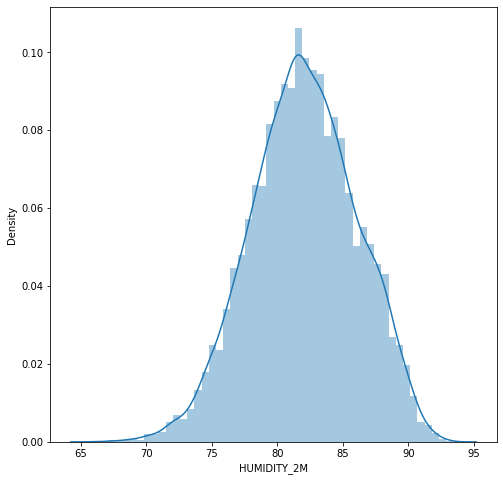

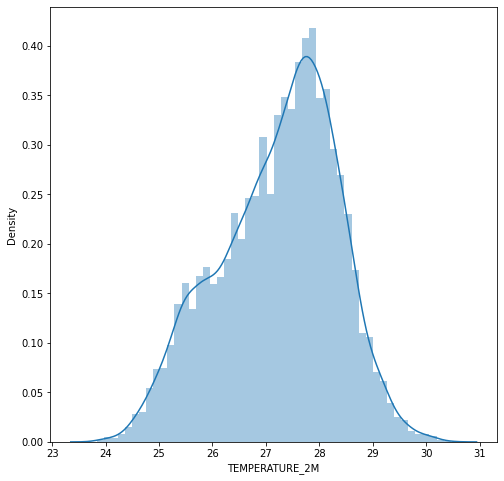

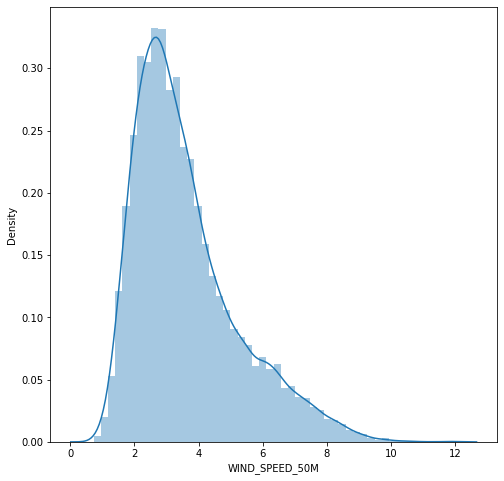

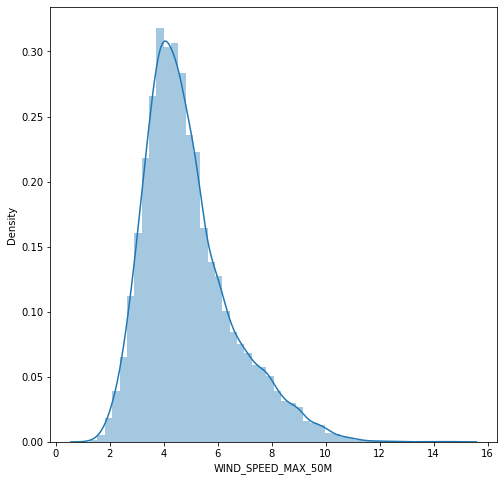

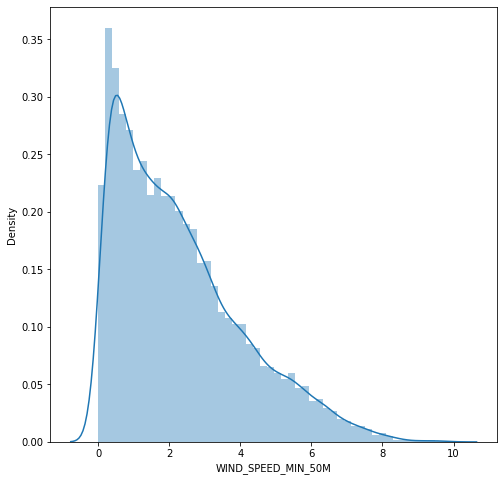

In [8]:
# Checking for missing values in HUMIDITY_2M column
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data.HUMIDITY_2M)

# Checking for missing values in TEMPERATURE_2M column
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data.TEMPERATURE_2M)

# Checking for missing values in WIND_SPEED_10M column
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data.WIND_SPEED_50M)

# Checking for missing values in WIND_SPEED_MAX_10M column
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data.WIND_SPEED_MAX_50M)

# Checking for missing values in WIND_SPEED_MIN_10M column
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data.WIND_SPEED_MIN_50M)

In [9]:
# Checking for median of each column to handle missing values
data.median()

<ipython-input-9-5b13b5076289>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.median()


TEMPERATURE_2M        27.39
HUMIDITY_2M           82.00
WIND_SPEED_MAX_50M     4.56
WIND_SPEED_MIN_50M     1.93
WIND_SPEED_50M         3.22
dtype: float64

In [10]:
# Replacing the missing values with the median value 

# TEMPERATURE_2M
data['TEMPERATURE_2M'].fillna(data['TEMPERATURE_2M'].median(), inplace = True)
data.isnull().sum()

# HUMIDITY_2M
data['HUMIDITY_2M'].fillna(data['HUMIDITY_2M'].median(), inplace = True)
data.isnull().sum()

# WIND_SPEED_50M
data['WIND_SPEED_50M'].fillna(data['WIND_SPEED_50M'].median(), inplace = True)
data.isnull().sum()

# WIND_SPEED_MAX_50M
data['WIND_SPEED_MAX_50M'].fillna(data['WIND_SPEED_MAX_50M'].median(), inplace = True)
data.isnull().sum()

# WIND_SPEED_MIN_50M
data['WIND_SPEED_MIN_50M'].fillna(data['WIND_SPEED_MIN_50M'].median(), inplace = True)
data.isnull().sum()


date                  0
TEMPERATURE_2M        0
HUMIDITY_2M           0
WIND_SPEED_MAX_50M    0
WIND_SPEED_MIN_50M    0
WIND_SPEED_50M        0
dtype: int64

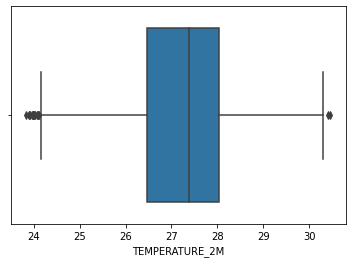

In [ ]:
# Checking for outliers in the data

# TEMPERATURE_2M
sns.boxplot(x=data["TEMPERATURE_2M"])



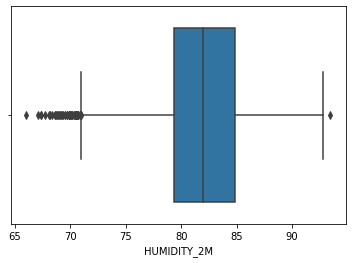

In [ ]:
# HUMIDITY_2M
sns.boxplot(x=data["HUMIDITY_2M"])



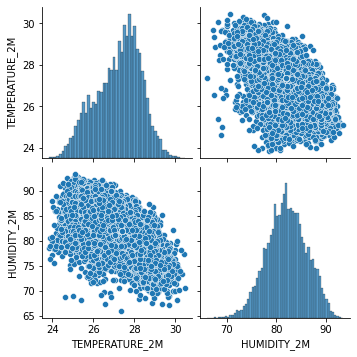

In [ ]:
#Plot graph on numerical attribute to detect outliers
sns.pairplot(data=data, vars=['TEMPERATURE_2M',
'HUMIDITY_2M'])

In [ ]:
# Handling outliers
# As the outliers are meaningful log transformation will be used to handle the outliers

data["TEMPERATURE_2M"] = np.log(data["TEMPERATURE_2M"] + 1)
data["HUMIDITY_2M"] = np.log(data["HUMIDITY_2M"] + 1)


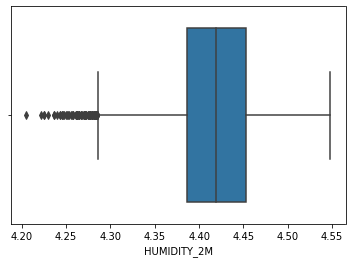

In [ ]:
# HUMIDITY_2M
sns.boxplot(x=data["HUMIDITY_2M"])

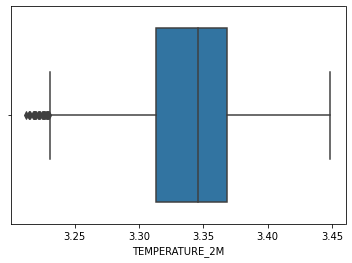

In [ ]:
# Checking for outliers in the data

# TEMPERATURE_2M
sns.boxplot(x=data["TEMPERATURE_2M"])



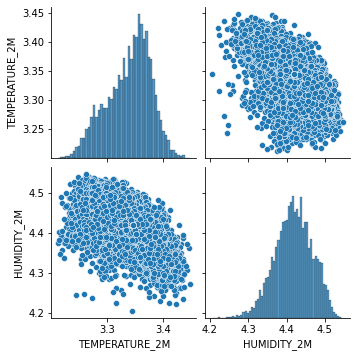

In [ ]:
# Checking the corrected outliers data
sns.pairplot(data=data, vars=['TEMPERATURE_2M',
'HUMIDITY_2M'])

In [ ]:
# Create new columns that might be useful

# Interaction between Temperature and Humidity

data["HUMTEMPINTERACTION"] = data["HUMIDITY_2M"] * data["TEMPERATURE_2M"]

In [ ]:
data["WIND_SPEED_RANGE"] = data["WIND_SPEED_MAX_50M"] - data["WIND_SPEED_MIN_50M"]

In [ ]:
data

,date,TEMPERATURE_2M,HUMIDITY_2M,WIND_SPEED_MAX_50M,WIND_SPEED_MIN_50M,WIND_SPEED_50M
0,1982-01-01,25.87,85.06,6.38,4.58,5.44
1,1982-01-02,25.64,84.31,7.27,5.03,6.23
2,1982-01-03,25.45,84.06,6.70,4.41,5.19
3,1982-01-04,25.37,85.12,5.81,4.73,5.18
4,1982-01-05,25.40,83.19,6.22,4.88,5.54
...,...,...,...,...,...,...
15001,2023-01-27,NaN,NaN,NaN,NaN,NaN
15002,2023-01-28,NaN,NaN,NaN,NaN,NaN
15003,2023-01-29,NaN,NaN,NaN,NaN,NaN
15004,2023-01-30,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create a column which shows the Beufort Scale (from WIND_SPEED_50M)
Class = []
for row in data['WIND_SPEED_50M']:
      if 0 <= row <= 0.2 : Class.append('Calm')
      elif 0.3 <= row <= 1.5: Class.append('Light air')
      elif 1.6 <= row <= 3.3: Class.append('Light Breeze')
      elif 3.4 <= row <= 5.4: Class.append('Gentle breeze')
      elif 5.5 <= row <= 7.9: Class.append('Moderate breeze')
      elif 8.0 <= row <= 10.7: Class.append('Fresh breeze')
      elif 10.8 <= row <= 13.8: Class.append('Strong breeze')
      elif 13.9 <= row <= 17.1: Class.append('Near Gale')
      elif 17.2 <= row <= 20.7: Class.append('Gale')
      elif 20.8 <= row <= 24.4: Class.append('Strong gale')
      elif 24.5 <= row <= 28.4: Class.append('Storm')
      elif 28.5 <= row <= 32.6: Class.append('Violent Storm')
      elif row > 32.7: Class.append('Hurricane')
      else:
          Class.append('Others')

data['Class'] = Class
data

,date,TEMPERATURE_2M,HUMIDITY_2M,WIND_SPEED_MAX_50M,WIND_SPEED_MIN_50M,WIND_SPEED_50M,HUMTEMPINTERACTION,Class
0,1982-01-01,3.291010,4.455045,6.38,4.58,5.44,14.661599,Others
1,1982-01-02,3.282414,4.446292,7.27,5.03,6.23,14.594569,Moderate breeze
2,1982-01-03,3.275256,4.443357,6.70,4.41,5.19,14.553132,Gentle breeze
3,1982-01-04,3.272227,4.455742,5.81,4.73,5.18,14.580198,Gentle breeze
4,1982-01-05,3.273364,4.433076,6.22,4.88,5.54,14.511072,Moderate breeze
...,...,...,...,...,...,...,...,...
15001,2023-01-27,3.346037,4.418841,4.56,1.93,3.22,14.785604,Light Breeze
15002,2023-01-28,3.346037,4.418841,4.56,1.93,3.22,14.785604,Light Breeze
15003,2023-01-29,3.346037,4.418841,4.56,1.93,3.22,14.785604,Light Breeze
15004,2023-01-30,3.346037,4.418841,4.56,1.93,3.22,14.785604,Light Breeze


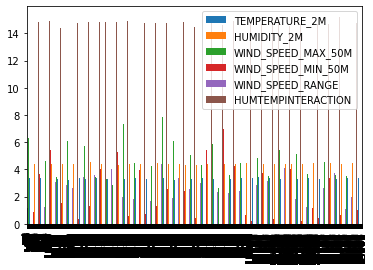

In [ ]:
#Display bar graph against the numerical independent variables.
data[['TEMPERATURE_2M', 'HUMIDITY_2M',
'WIND_SPEED_MAX_50M',
'WIND_SPEED_MIN_50M','WIND_SPEED_RANGE',
'HUMTEMPINTERACTION']].plot(kind = 'bar')


In [ ]:
# Normalization performed on the selected independent variables. 

# Standardization (as the outliers or extreme values have a significant impact on the analysis.))

# Separate the independent variables from the dependent variable
X = data.drop(['WIND_SPEED_50M','date','Class','DAY','MONTH','YEAR'], axis=1)
y = data['WIND_SPEED_50M']

# Standardization
X = (X - X.mean())/X.std()

In [ ]:
data


,date,TEMPERATURE_2M,HUMIDITY_2M,WIND_SPEED_MAX_50M,WIND_SPEED_MIN_50M,WIND_SPEED_50M,HUMTEMPINTERACTION,WIND_SPEED_RANGE,Class,YEAR,MONTH,DAY
0,1982-01-01,3.291010,4.455045,6.38,4.58,5.44,14.661599,1.80,Others,1982,1,1
1,1982-01-02,3.282414,4.446292,7.27,5.03,6.23,14.594569,2.24,Moderate breeze,1982,1,2
2,1982-01-03,3.275256,4.443357,6.70,4.41,5.19,14.553132,2.29,Gentle breeze,1982,1,3
3,1982-01-04,3.272227,4.455742,5.81,4.73,5.18,14.580198,1.08,Gentle breeze,1982,1,4
4,1982-01-05,3.273364,4.433076,6.22,4.88,5.54,14.511072,1.34,Moderate breeze,1982,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15001,2023-01-27,3.346037,4.418841,4.56,1.93,3.22,14.785604,2.63,Light Breeze,2023,1,27
15002,2023-01-28,3.346037,4.418841,4.56,1.93,3.22,14.785604,2.63,Light Breeze,2023,1,28
15003,2023-01-29,3.346037,4.418841,4.56,1.93,3.22,14.785604,2.63,Light Breeze,2023,1,29
15004,2023-01-30,3.346037,4.418841,4.56,1.93,3.22,14.785604,2.63,Light Breeze,2023,1,30


In [ ]:

# Convert the date column to datetime format
data["date"] = pd.to_datetime(data["date"])

# Extract the year, month, and day information
data["YEAR"] = data["date"].dt.year
data["MONTH"] = data["date"].dt.month
data["DAY"] = data["date"].dt.day

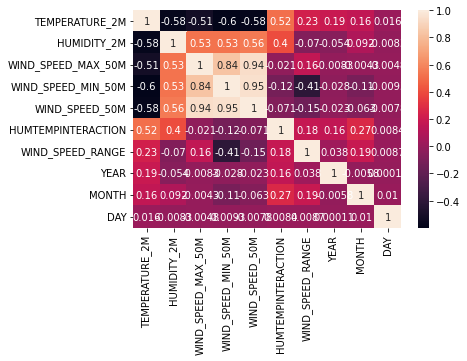

In [ ]:
# Visualization
# Calculate the pairwise correlations between the variables
corr = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


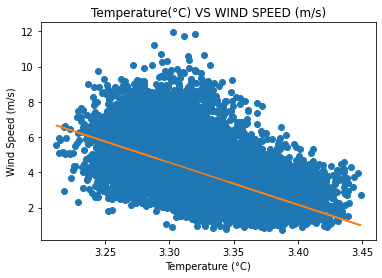

In [ ]:

# Graphical Correlation
# Correlation between Temperature and Wind Speed

import statsmodels.api as sm

# Fit a linear regression model to the data
X = sm.add_constant(data["TEMPERATURE_2M"])
model = sm.OLS(data["WIND_SPEED_50M"], X).fit()

# Plot the data and regression line
plt.plot(data["TEMPERATURE_2M"], data["WIND_SPEED_50M"], "o")
plt.plot(data["TEMPERATURE_2M"], model.predict(X), "-")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
plt.title("Temperature(°C) VS WIND SPEED (m/s)")
plt.show()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


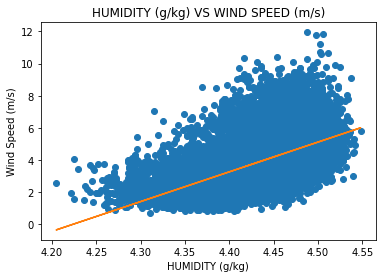

In [ ]:
# Correlation between Humidity and Wind Speed


# Fit a linear regression model to the data
X = sm.add_constant(data["HUMIDITY_2M"])
model = sm.OLS(data["WIND_SPEED_50M"], X).fit()

# Plot the data and regression line
plt.plot(data["HUMIDITY_2M"], data["WIND_SPEED_50M"], "o")
plt.plot(data["HUMIDITY_2M"], model.predict(X), "-")
plt.xlabel("HUMIDITY (g/kg)")
plt.ylabel("Wind Speed (m/s)")
plt.title("HUMIDITY (g/kg) VS WIND SPEED (m/s)")
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


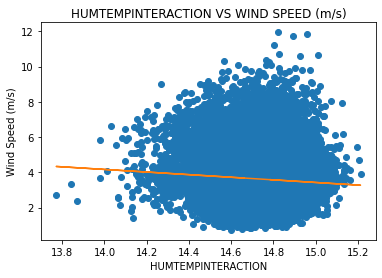

In [ ]:
# Correlation between Humidity + Temperature and Wind Speed


# Fit a linear regression model to the data
X = sm.add_constant(data["HUMTEMPINTERACTION"])
model = sm.OLS(data["WIND_SPEED_50M"], X).fit()

# Plot the data and regression line
plt.plot(data["HUMTEMPINTERACTION"], data["WIND_SPEED_50M"], "o")
plt.plot(data["HUMTEMPINTERACTION"], model.predict(X), "-")
plt.xlabel("HUMTEMPINTERACTION")
plt.ylabel("Wind Speed (m/s)")
plt.title("HUMTEMPINTERACTION VS WIND SPEED (m/s)")
plt.show()

Text(0.5, 1.0, 'MONTH VS Wind Speed (m/s)')

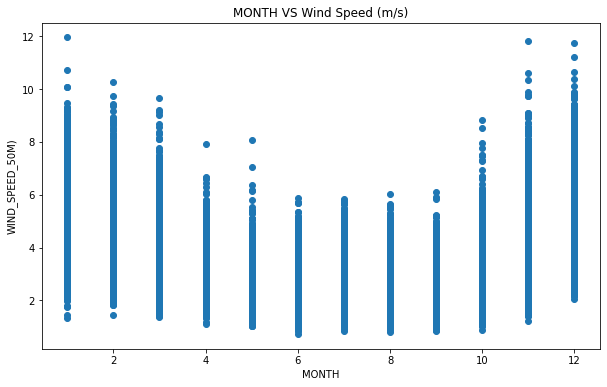

In [ ]:
# Visualize the relationship between Months and wind speed 

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = data['WIND_SPEED_50M'], x =
data['MONTH'])
plt.ylabel("WIND_SPEED_50M)")
plt.xlabel("MONTH")
plt.title("MONTH VS Wind Speed (m/s)")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


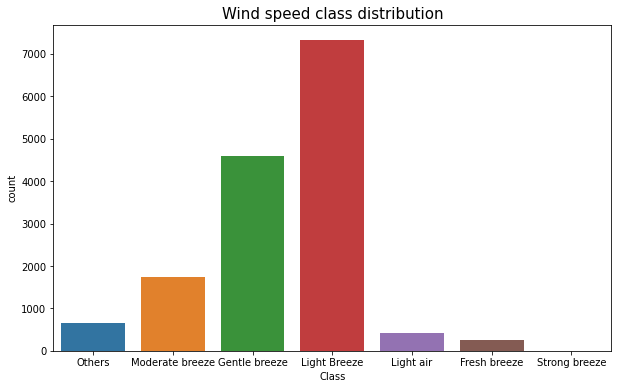

In [ ]:
#To observe the overall distribution of the Maximum Wind Speed in Terengganu from 1982 - 2021.
#Wind Speed Class bar graph
plt.figure(figsize=(10,6))
sns.countplot(data["Class"])
plt.title("Wind speed class distribution", size=15)
plt.show()

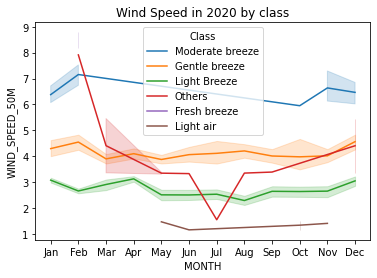

In [ ]:
# Filter the data to include only the year 2019
data_2020 = data[data['YEAR'] == 2020]
# Create a line plot with 'month' on the x-axis and 'WIND SPEED_MAX(m/s)_normalize' on the y-axis
sns.lineplot(x='MONTH', y='WIND_SPEED_50M',
hue='Class', data=data_2020)
# Add labels to the x-axis and y-axis
plt.xlabel('MONTH')
plt.ylabel('WIND_SPEED_50M')
# Add a title to the plot
plt.title('Wind Speed in 2020 by class')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show()


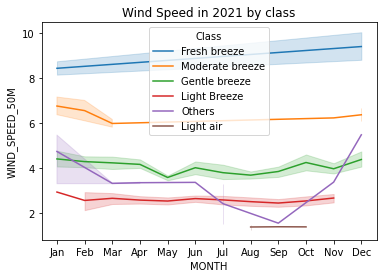

In [ ]:
# Filter the data to include only the year 2019
data_2021 = data[data['YEAR'] == 2021]
# Create a line plot with 'month' on the x-axis and 'WIND SPEED_MAX(m/s)_normalize' on the y-axis
sns.lineplot(x='MONTH', y='WIND_SPEED_50M',
hue='Class', data=data_2021)
# Add labels to the x-axis and y-axis
plt.xlabel('MONTH')
plt.ylabel('WIND_SPEED_50M')
# Add a title to the plot
plt.title('Wind Speed in 2021 by class')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show()

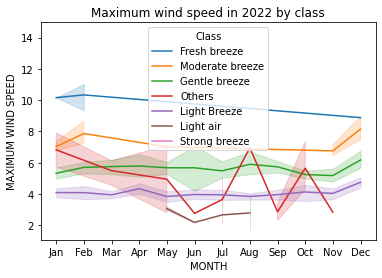

In [ ]:
# Filter the data to include only the year 2020
data_2022 = data[data['YEAR'] == 2022]

# Create a line plot with 'month' on the x-axis and 'WINDSPEED_MAX(m/s)_normalize' on the y-axis
sns.lineplot(x='MONTH', y='WIND_SPEED_MAX_50M',
hue='Class', data=data_2022)
# Add labels to the x-axis and y-axis
plt.xlabel('MONTH')
plt.ylabel('MAXIMUM WIND SPEED')
# Add a title to the plot
plt.title('Maximum wind speed in 2022 by class')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show()

In [ ]:
# Model 1 (Linear Regression)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# Split the data into features (X) and target (y)
# Split the data into features and target
X = data.drop(["WIND_SPEED_50M","date","Class"], axis=1)
y = data["WIND_SPEED_50M"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate the R-squared value
r2_linear_regression = r2_score(y_test, y_pred)
print("R-squared:", r2_linear_regression)

Mean Squared Error: 0.056974788633779055
R-squared: 0.9785506717165019


In [1]:
# Model 2 (XGBoost)
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



# Split the data into features and target
X = data.drop(["WIND_SPEED_50M","date","Class"], axis=1)
y = data["WIND_SPEED_50M"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the XGBoost model
regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
regressor.fit(X_train, y_train)

# Predict the target values for test data
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

NameError: ignored

In [ ]:
# Model 3 (Random Forest)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Split the data into features and target
X = data.drop(["WIND_SPEED_50M","date","Class"], axis=1)
y = data["WIND_SPEED_50M"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.06298885424716855
R-squared: 0.9762865533098632


In [ ]:
# Model 4 (Decision Tree)

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Split the data into features and target
X = data.drop(["WIND_SPEED_50M","date","Class"], axis=1)
y = data["WIND_SPEED_50M"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.11837944703530978
R-squared: 0.9554336280595883


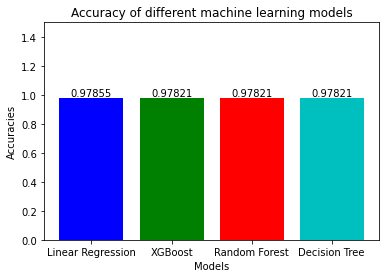

In [ ]:
# Comparing the accuracies of Linear Regression, Random Forest, XGBoost, Decision Tree models

import matplotlib.pyplot as plt

model_names = ['Linear Regression', 'XGBoost','Random Forest', 'Decision Tree']
accuracies = [0.9785506717165019, 0.9782063715520845, 0.9782063715520845, 0.9782063715520845]

bar_colors = ['b', 'g', 'r', 'c']

fig, ax = plt.subplots()
for i, accuracy in enumerate(accuracies):
    ax.bar(model_names[i], accuracy, color=bar_colors[i])
    ax.text(model_names[i], accuracy + 0.01, '%.5f' % accuracy, ha='center')

plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Accuracy of different machine learning models')
plt.ylim(0, 1.5)
plt.show()

In [ ]:
# Import the cleaned data

# Save the cleaned data to a new file
data.to_csv("downloaded_cleaned_data.csv", index=False)